[INFO] Generating occlusion masks...


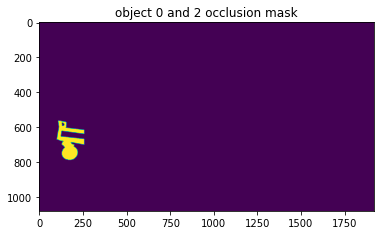

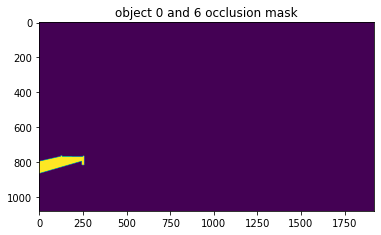

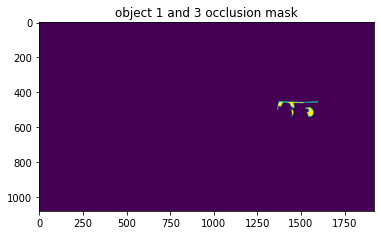

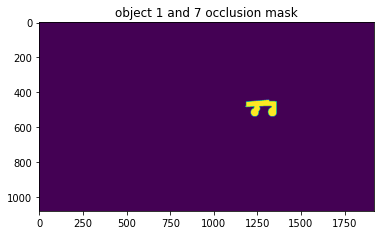

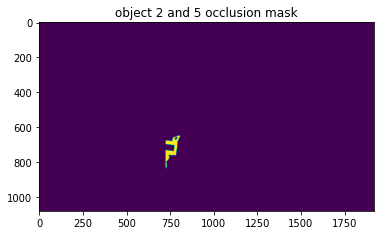

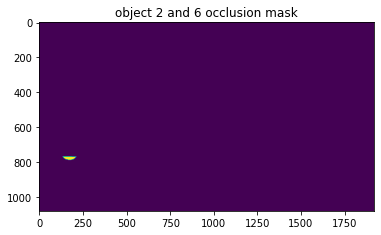

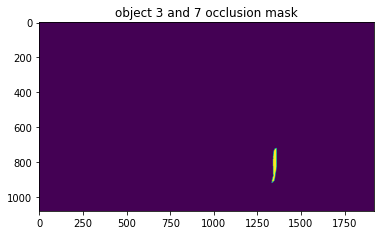

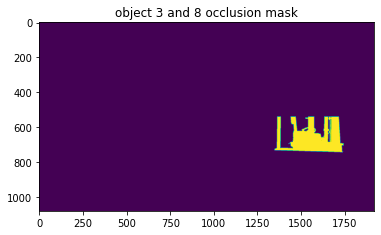

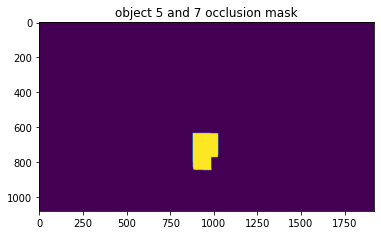

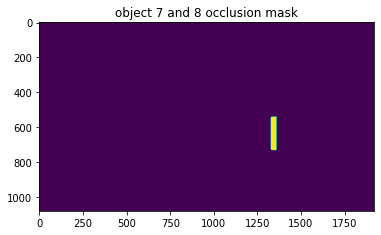

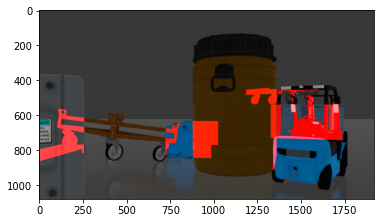

{0: {'amodal': [], 'occlusion': [], 'visible': []},
 1: {'amodal': [], 'occlusion': [], 'visible': []},
 2: {'amodal': [], 'occlusion': [], 'visible': []},
 3: {'amodal': [], 'occlusion': [], 'visible': []},
 4: {'amodal': [], 'occlusion': [], 'visible': []},
 5: {'amodal': [], 'occlusion': [], 'visible': []},
 6: {'amodal': [], 'occlusion': [], 'visible': []},
 7: {'amodal': [], 'occlusion': [], 'visible': []},
 8: {'amodal': [], 'occlusion': [], 'visible': []}}

In [12]:
import os

output_dir = "sample_data"

num_scenes = 1

# generate occlusion masks
print("[INFO] Generating occlusion masks...")
rgb_dir = f"{output_dir}/rgb"
rgb_occ_dir = f"{output_dir}/test/rgb_occ_dir"
semantic_dir = f"{output_dir}/semantic"
occlusion_dir = f"{output_dir}/test/occlusion"
occlusion_vis_dir = f"{occlusion_dir}/visualize"

for dir in [rgb_occ_dir,occlusion_dir,occlusion_vis_dir]:
    if not os.path.exists(dir):
        os.makedirs(dir)

import glob
import cv2
import numpy as np
from src.helper_functions import compute_occluded_masks
import matplotlib.pyplot as plt
from collections import defaultdict
occlusion_rate_thres = 1.0

# get visible mask and amodal mask of each object id 1

# occlusion_rate = occluded mask area / amodal mask area

for scene_index in range(num_scenes):
    
    # initialize object dictionary
    obj_dict = {}
    
    rgb_img = cv2.imread(f"{rgb_dir}/{scene_index}.png", cv2.IMREAD_UNCHANGED)
    occ_index = 1
    img_list = glob.glob(f"{semantic_dir}/{scene_index}*.png")
    if len(img_list) > 0:
        for i in range(len(img_list)):
            path1 = img_list[i]
            mask1 = cv2.imread(path1, cv2.IMREAD_UNCHANGED)

            obj_dict[i] = {"amodal":mask1, "occlusion":[], "visible":[]}

            for j in range(i,len(img_list)):
                if i == j:
                    pass
                else:
                    path2 = img_list[j]
                    mask2 = cv2.imread(path2, cv2.IMREAD_UNCHANGED)
                    iou, intersection_mask = compute_occluded_masks(mask1, mask2)
                    # add occluded masks to image
                    if iou > 0: # occlusion detected
                        save_path = f"{occlusion_dir}/{scene_index}_{occ_index}.png"
                        cv2.imwrite(save_path,intersection_mask)
                        
                        save_path = f"{occlusion_vis_dir}/{scene_index}_{occ_index}.png"
                        cv2.imwrite(save_path,intersection_mask* 255)
                        
                        plt.title(f"object {i} and {j} occlusion mask")
                        plt.imshow(intersection_mask* 255)
                        plt.show()
    
                        # visulize occlusion masks on rgb
                        red = np.ones(intersection_mask.shape)
                        red = red*255
                        rgb_img[:,:,0][intersection_mask>0] = red[intersection_mask>0]
                        occ_index += 1


    save_path = f"{rgb_occ_dir}/{scene_index}.png"
    cv2.imwrite(save_path,rgb_img)
    plt.imshow(cv2.cvtColor(rgb_img, cv2.COLOR_RGB2BGR))
    plt.show()

obj_dict


In [11]:
from collections import defaultdict
obj_dict = defaultdict(list)
obj_dict

defaultdict(list, {})